
### Get the Dataset Here: 
https://www.kaggle.com/josephgpinto/data-science-survey/data

For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

To share some of the initial insights from the survey, we’ve worked with the folks from The Pudding to put together this interactive report. They’ve shared all of the kernels used in the report here.

### Step 1: Load Necessary Libraries:

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,8

### Step 2: Load the Data:

In [9]:
data = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
print(data.shape)

(16716, 228)


### Step 3: Data Visualization:
We will start buy visualizing the Gender count that took part in the survey as per comprehensive view.
The plot below shows the number of Females and Males and other sexes that took their time to finish the survey.

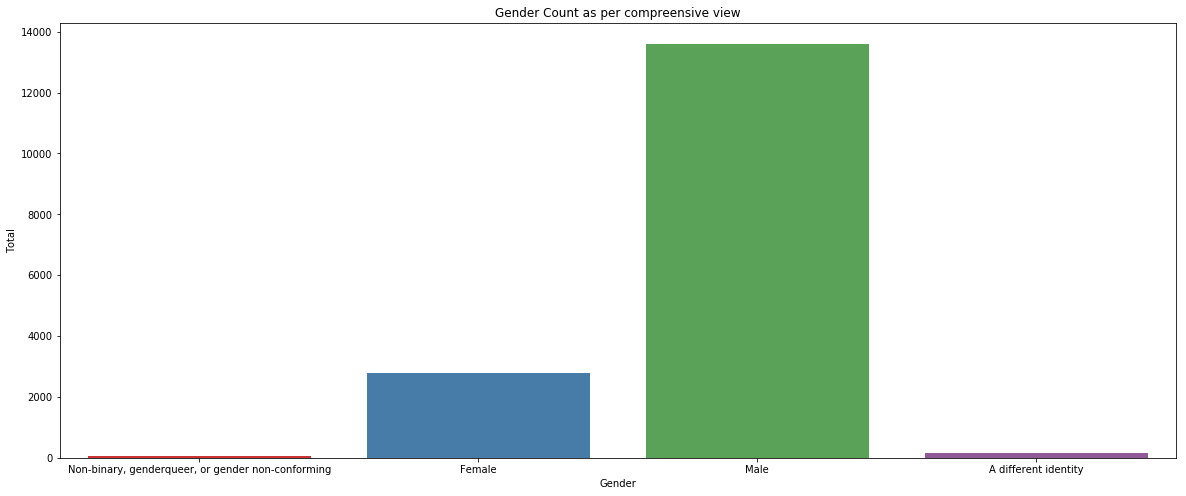

In [11]:
# fig, ax = plt.subplots(2,1, figsize = (20,15))
ax= sns.countplot(x = 'GenderSelect', data = data, palette = 'Set1')
ax.set(title = 'Gender Count as per compreensive view', ylabel = 'Total', xlabel = 'Gender')
plt.show()

### Plot 2:
This plot shows the countries and the number of people who took the survey from those countries

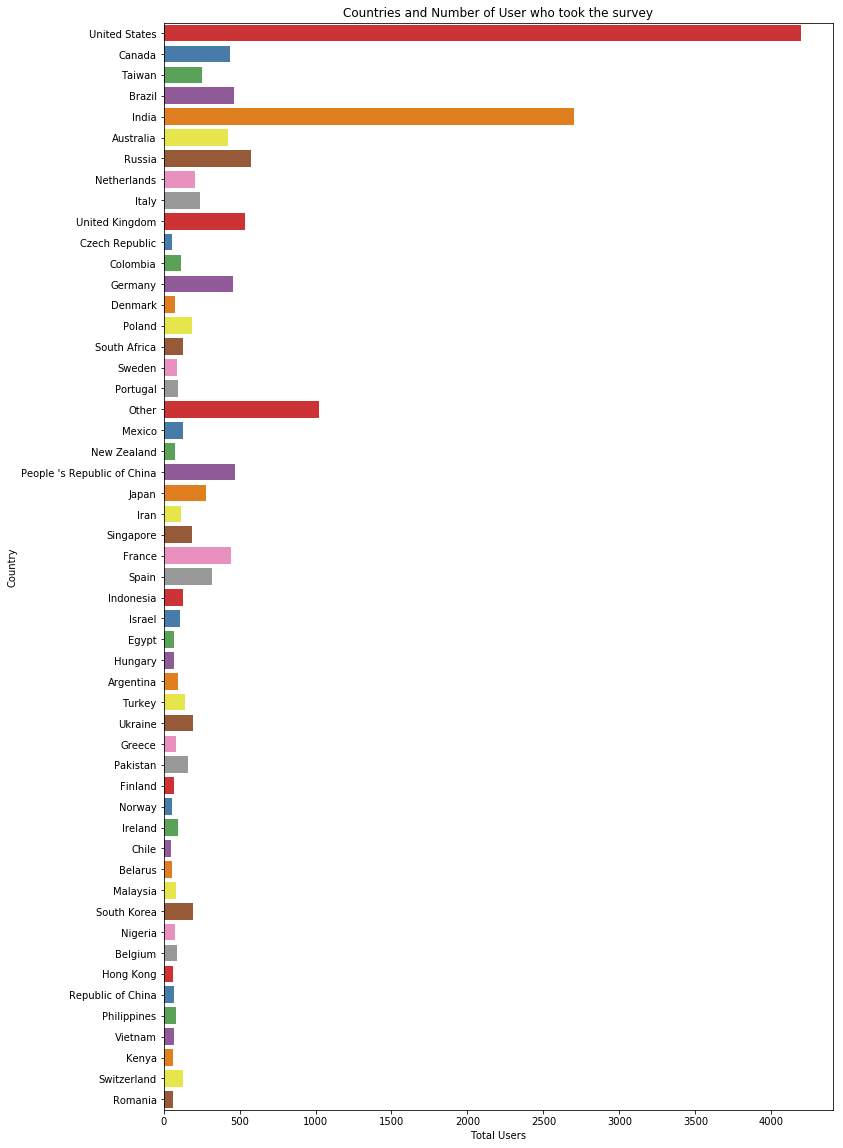

In [12]:
fig, ax = plt.subplots(1,1, figsize = (12,20))
sns.countplot(y = 'Country', data = data, palette = 'Set1')
ax.set(title = 'Countries and Number of User who took the survey', ylabel = 'Country', xlabel = 'Total Users')
plt.show()

### Plot 2:
This plot shows the countries and the number of people who took the survey from those countries categorized by 
their Genders.

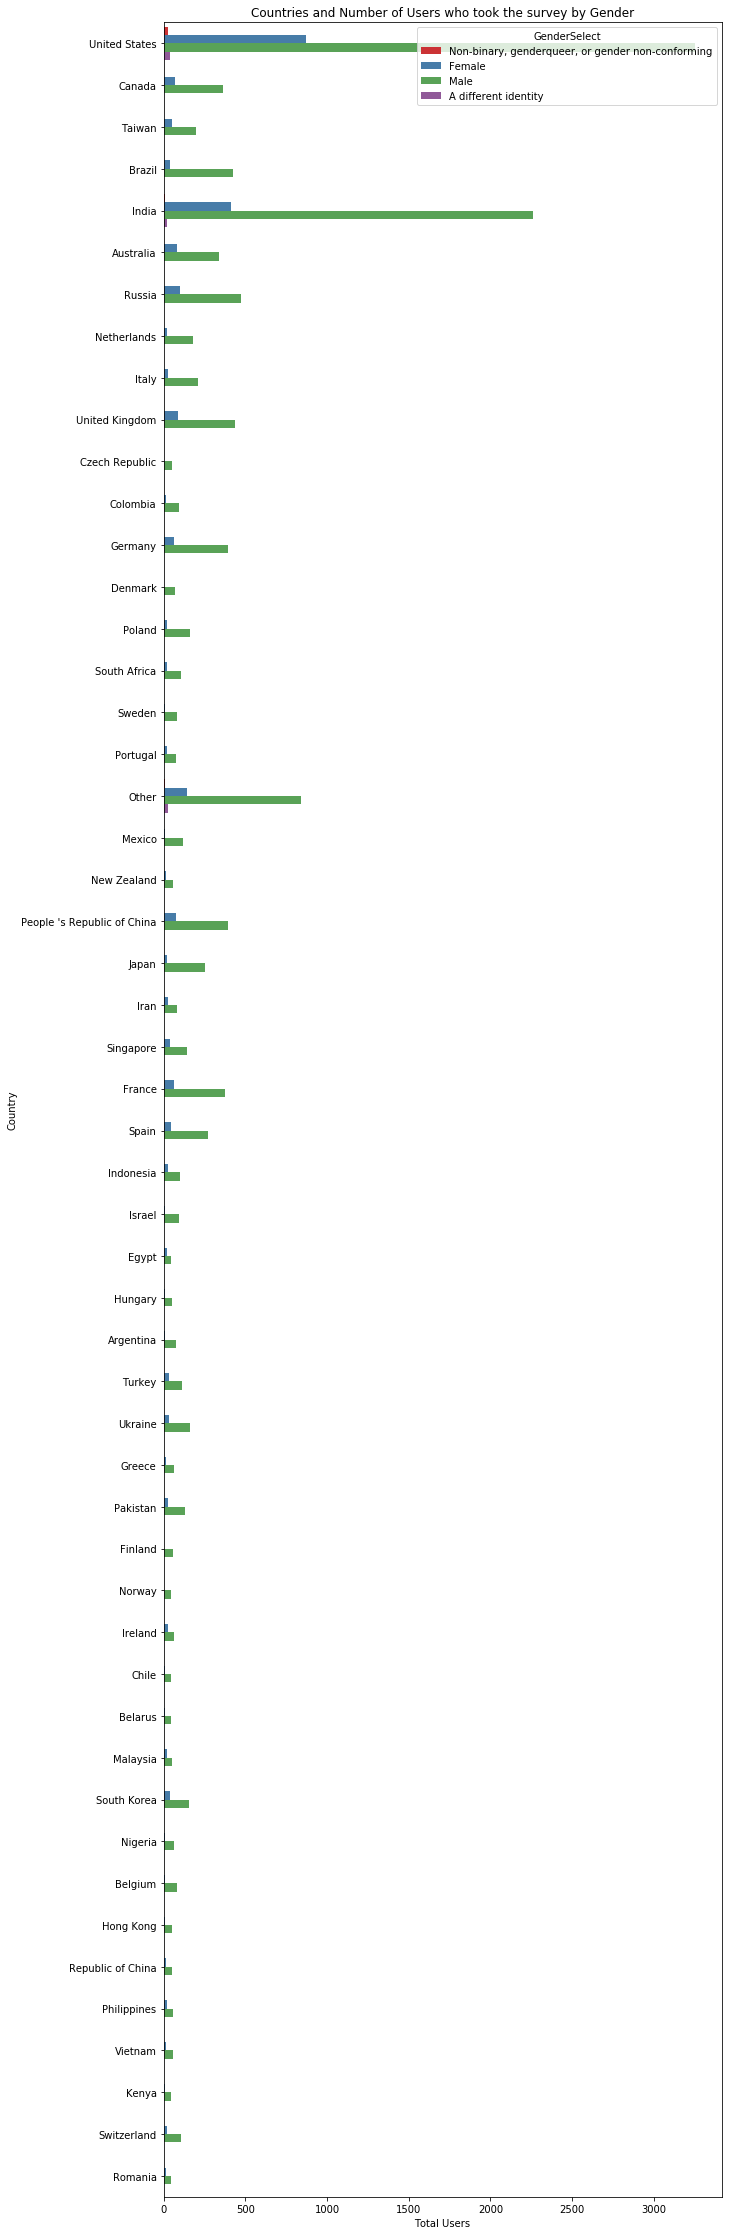

In [13]:
fig, ax = plt.subplots(1,1, figsize = (10,40))
sns.countplot(y = 'Country', data = data, hue = 'GenderSelect', palette = 'Set1')
ax.set(title = 'Countries and Number of Users who took the survey by Gender', ylabel = 'Country', xlabel = 'Total Users')
plt.show()

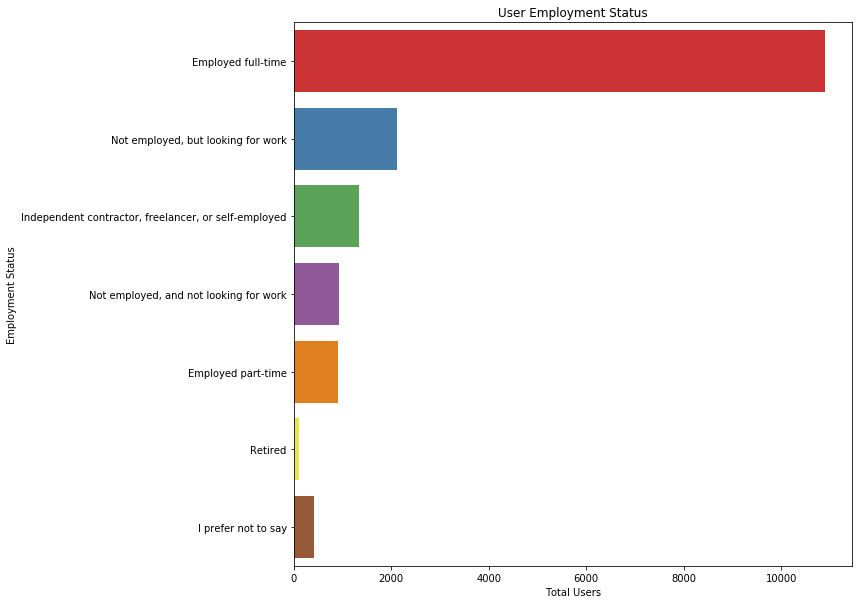

In [14]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sns.countplot(y = 'EmploymentStatus', data = data, palette = 'Set1')
ax.set(title = 'User Employment Status', ylabel = 'Employment Status', xlabel = 'Total Users')
plt.show()

### Employment Status as per Gender:

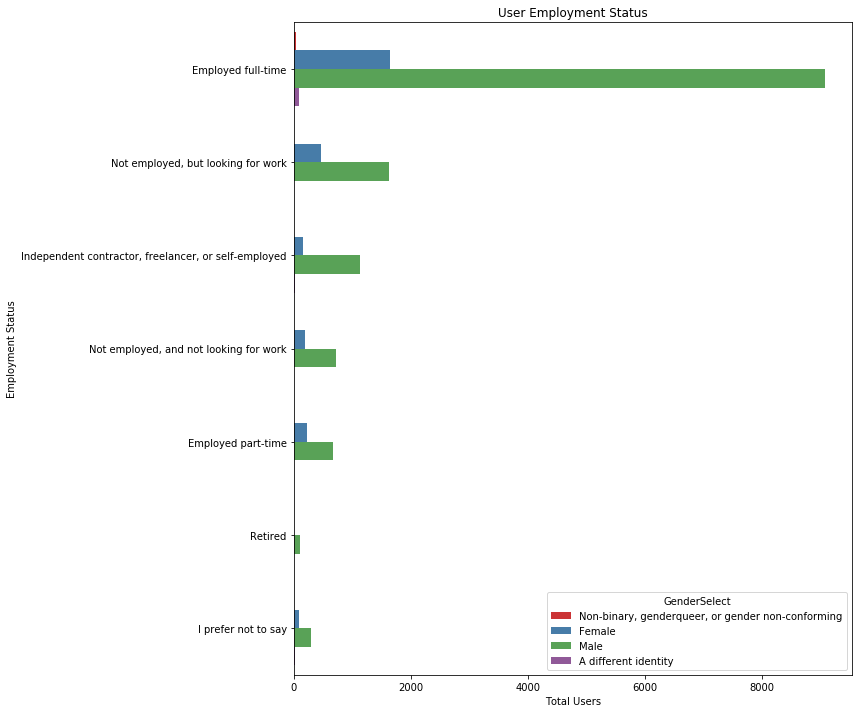

In [15]:
fig, ax = plt.subplots(1,1, figsize = (10,12))
sns.countplot(y = 'EmploymentStatus', data = data,hue='GenderSelect', palette = 'Set1')
ax.set(title = 'User Employment Status', ylabel = 'Employment Status', xlabel = 'Total Users')
plt.show()

### Career Switchers: 
The Plot shows the number of people who are actively considering to switch careers to data science<br>
<b>Quesstion Asked:</b> Are you actively looking to switch careers to data science?

In [16]:
# First of all since we have NaNs in the Career Switcher column, we have to assume the user decided
# Not to specify, thus we replace the 'NaN' object with the text 'Unspecified' to make our job easier to do.

data['CareerSwitcher'].fillna('0', inplace = True)
data['CareerSwitcher'] = data['CareerSwitcher'].map({
    '0': 'Unspecified',
    'Yes':'Yes',
    'No':'No'
})

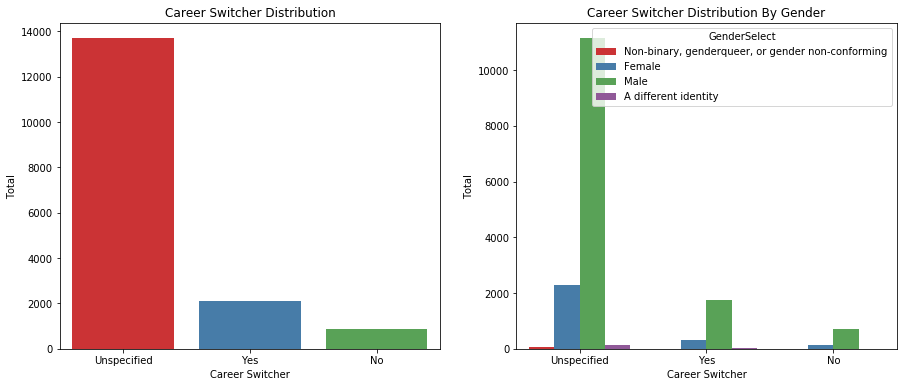

In [17]:
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x = 'CareerSwitcher', data = data, palette = 'Set1',ax=ax[0])
sns.countplot(x = 'CareerSwitcher', hue = 'GenderSelect', palette = 'Set1', data = data,ax=ax[1])
ax[0].set(title = 'Career Switcher Distribution', ylabel= 'Total', xlabel = 'Career Switcher')
ax[1].set(title = 'Career Switcher Distribution By Gender', ylabel= 'Total', xlabel = 'Career Switcher')
plt.show()

### Age and Gender Comparisons: Also Distribution plot of Age:
From the below example (Distribution plot) we can see that there is a higher concentration of users between the Age of 20 and 40, similarly...the results on the violin plot suggests so as well.

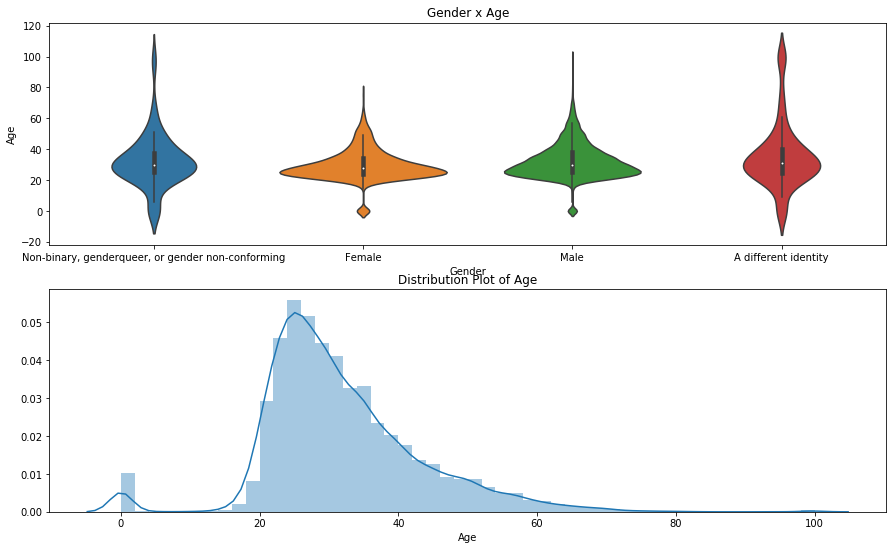

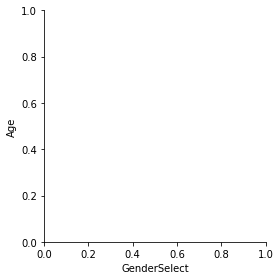

In [18]:
data['Age'].fillna(0, inplace = True)
fig, ax = plt.subplots(2,1, figsize = (15,9))
sns.factorplot(x = 'GenderSelect', y = 'Age',ax = ax[0], data = data, kind = 'violin')
sns.distplot(data['Age'],ax = ax[1])
ax[0].set(title = 'Gender x Age', xlabel = 'Gender')
ax[1].set(title = 'Distribution Plot of Age')
plt.show()

In [19]:
data['CurrentJobTitleSelect'].fillna('Unspecified', inplace = True)
data['CurrentJobTitleSelect'].unique()

array(['DBA/Database Engineer', 'Unspecified',
       'Operations Research Practitioner', 'Computer Scientist',
       'Data Scientist', 'Software Developer/Software Engineer',
       'Business Analyst', 'Engineer', 'Scientist/Researcher',
       'Researcher', 'Other', 'Data Analyst', 'Machine Learning Engineer',
       'Statistician', 'Predictive Modeler', 'Programmer', 'Data Miner'],
      dtype=object)

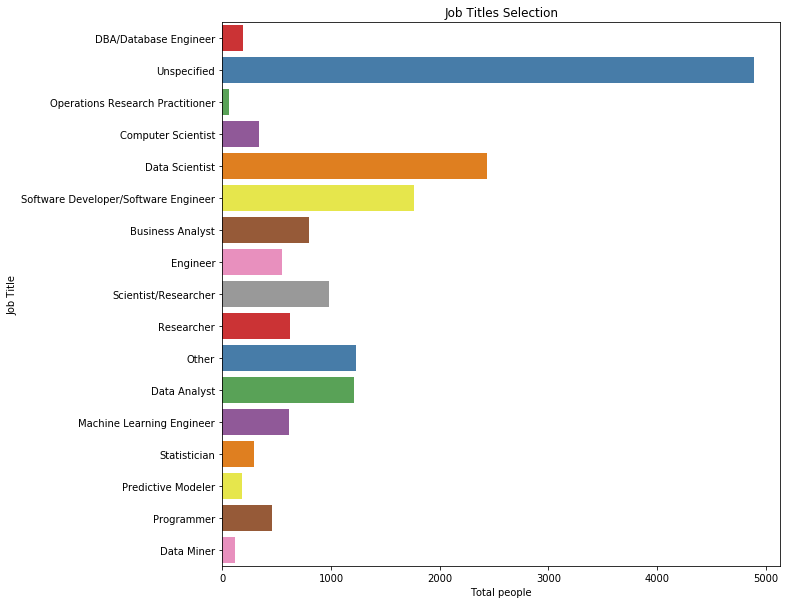

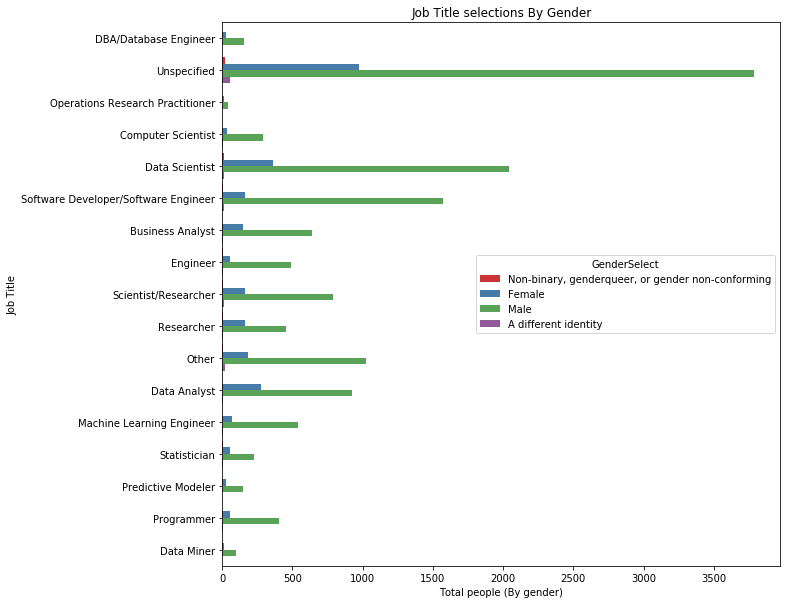

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.countplot(y = 'CurrentJobTitleSelect', data = data, palette = 'Set1')
ax.set(title = 'Job Titles Selection', ylabel = 'Job Title', xlabel = 'Total people')

fig, ax = plt.subplots(1,1, figsize = (10, 10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'GenderSelect', data = data, palette = 'Set1')
ax.set(title = 'Job Title selections By Gender', ylabel = 'Job Title', xlabel = 'Total people (By gender)')



plt.show()

In [21]:
data['CurrentJobTitleSelect'].unique()

array(['DBA/Database Engineer', 'Unspecified',
       'Operations Research Practitioner', 'Computer Scientist',
       'Data Scientist', 'Software Developer/Software Engineer',
       'Business Analyst', 'Engineer', 'Scientist/Researcher',
       'Researcher', 'Other', 'Data Analyst', 'Machine Learning Engineer',
       'Statistician', 'Predictive Modeler', 'Programmer', 'Data Miner'],
      dtype=object)

In [22]:
# LETS SHORTEN THE JOB TITLES FOR A CLEANER PLOT
data['CurrentJobTitleSelect'] = data['CurrentJobTitleSelect'].map({
    'DBA/Database Engineer' : 'DBA',
    'Unspecified': 'X',
    'Operations Research Practitioner': 'ORP',
    'Computer Scientist': 'CS',
    'Data Scientist': 'DS',
    'Software Developer/Software Engineer':'SE',
    'Business Analyst': 'BA',
    'Engineer':'EN',
    'Scientist/Researcher': 'S/R',
    'Researcer':'RES',
    'Other':'O',
    'Data Analyst': 'DA',
    'Machine Learning Engineer': 'MLE',
    'Statistician': 'ST',
    'Predictive Modeler': 'PM',
    'Programmer':'PR',
    'Data Miner':'DM'
})

In [23]:
data['LearningDataScience'].fillna('Unspecified', inplace = True)
data['LearningDataScience'].unique()

array(['Unspecified',
       "Yes, I'm focused on learning mostly data science skills",
       "Yes, but data science is a small part of what I'm focused on learning",
       'No, I am not focused on learning data science skills'],
      dtype=object)

Question Asked: <b>Are you currently focused on learning data science skills either formally or informally?</b><br/>
From the plot below, we can tell that most of the did not have an answer to this question or did not choose to answer it, Althoug most of those who answered came from the 'X' distribution which simply denotes people who are not employed or practicing formally in the Data Science/ Machine Learning field.

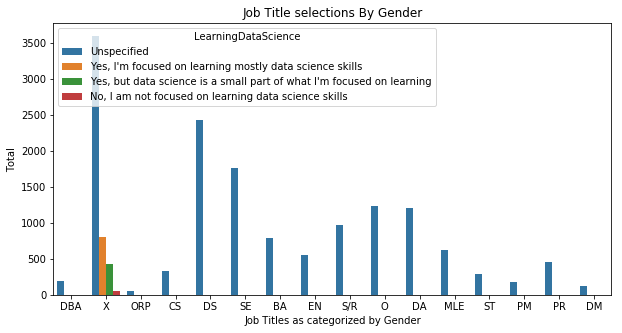

In [24]:
fig, ax = plt.subplots(1,1, figsize = (10, 5))
sns.countplot(x = 'CurrentJobTitleSelect',data = data, hue='LearningDataScience')
ax.set(title = 'Job Title selections By Gender', ylabel = 'Total', xlabel = 'Job Titles as categorized by Gender')
plt.show()

In [25]:
data['CodeWriter'].fillna('Unspecified', inplace = True)
# data['CodeWriter']

[Text(0.5,1,'Code Writer or Not In Total')]

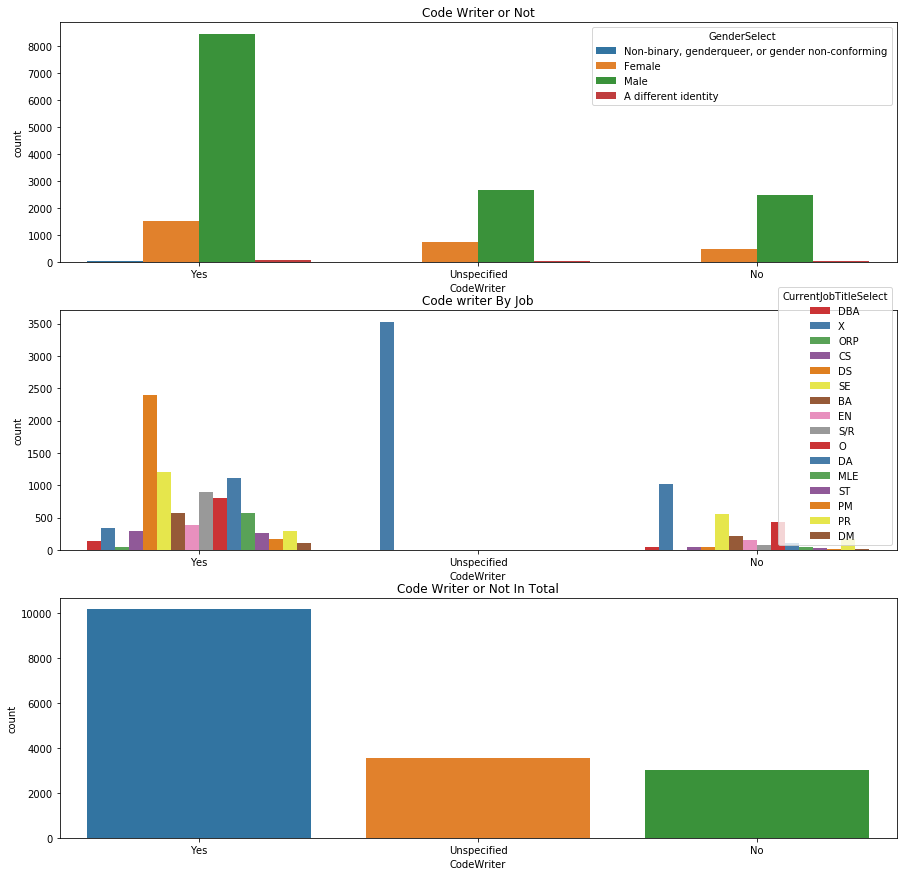

In [26]:
fig, ax = plt.subplots(nrows = 3, figsize = (15,15))
sns.countplot(x = 'CodeWriter', data = data, hue = 'GenderSelect',ax = ax[0])
sns.countplot(x = 'CodeWriter', data = data, palette = 'Set1', hue = 'CurrentJobTitleSelect',ax = ax[1])
sns.countplot(x = 'CodeWriter', data = data, ax = ax[2])
ax[0].set(title = 'Code Writer or Not')
ax[1].set(title = 'Code writer By Job')
ax[2].set(title = 'Code Writer or Not In Total')

In [27]:
data['StudentStatus'].unique()

array([nan, 'Yes', 'No'], dtype=object)

### Note: Work in Progress